In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets for CMPE 255/semma.csv"
df = pd.read_csv(path)

**SEMMA** stands for Sample, Explore, Modify, Model, and Assess. It's a five-step process for working with data in analytics projects. Let's break it down:

# **Step 1: Sample**
In this step, we collect the data that we want to analyze. Depending on the project, this could mean gathering data from various sources such as databases, APIs, or even manual data entry.

**columns**:

Age (Range: 18-65)

Income (Range: $20,000 - $100,000)

Purchase Amount (Range: $0 - $10,000)

Gender (Male, Female)

Region (North, South, East, West)

# **Step 2: Explore**
After gathering the data, the next step is to explore it to understand its nature, distribution, and any potential anomalies or outliers.

**Action**:

1. Generate summary statistics for each column.
2. Visualize the distributions of each column.
3. Check for missing values.

`Now, we'll proceed with the "Explore" step.`

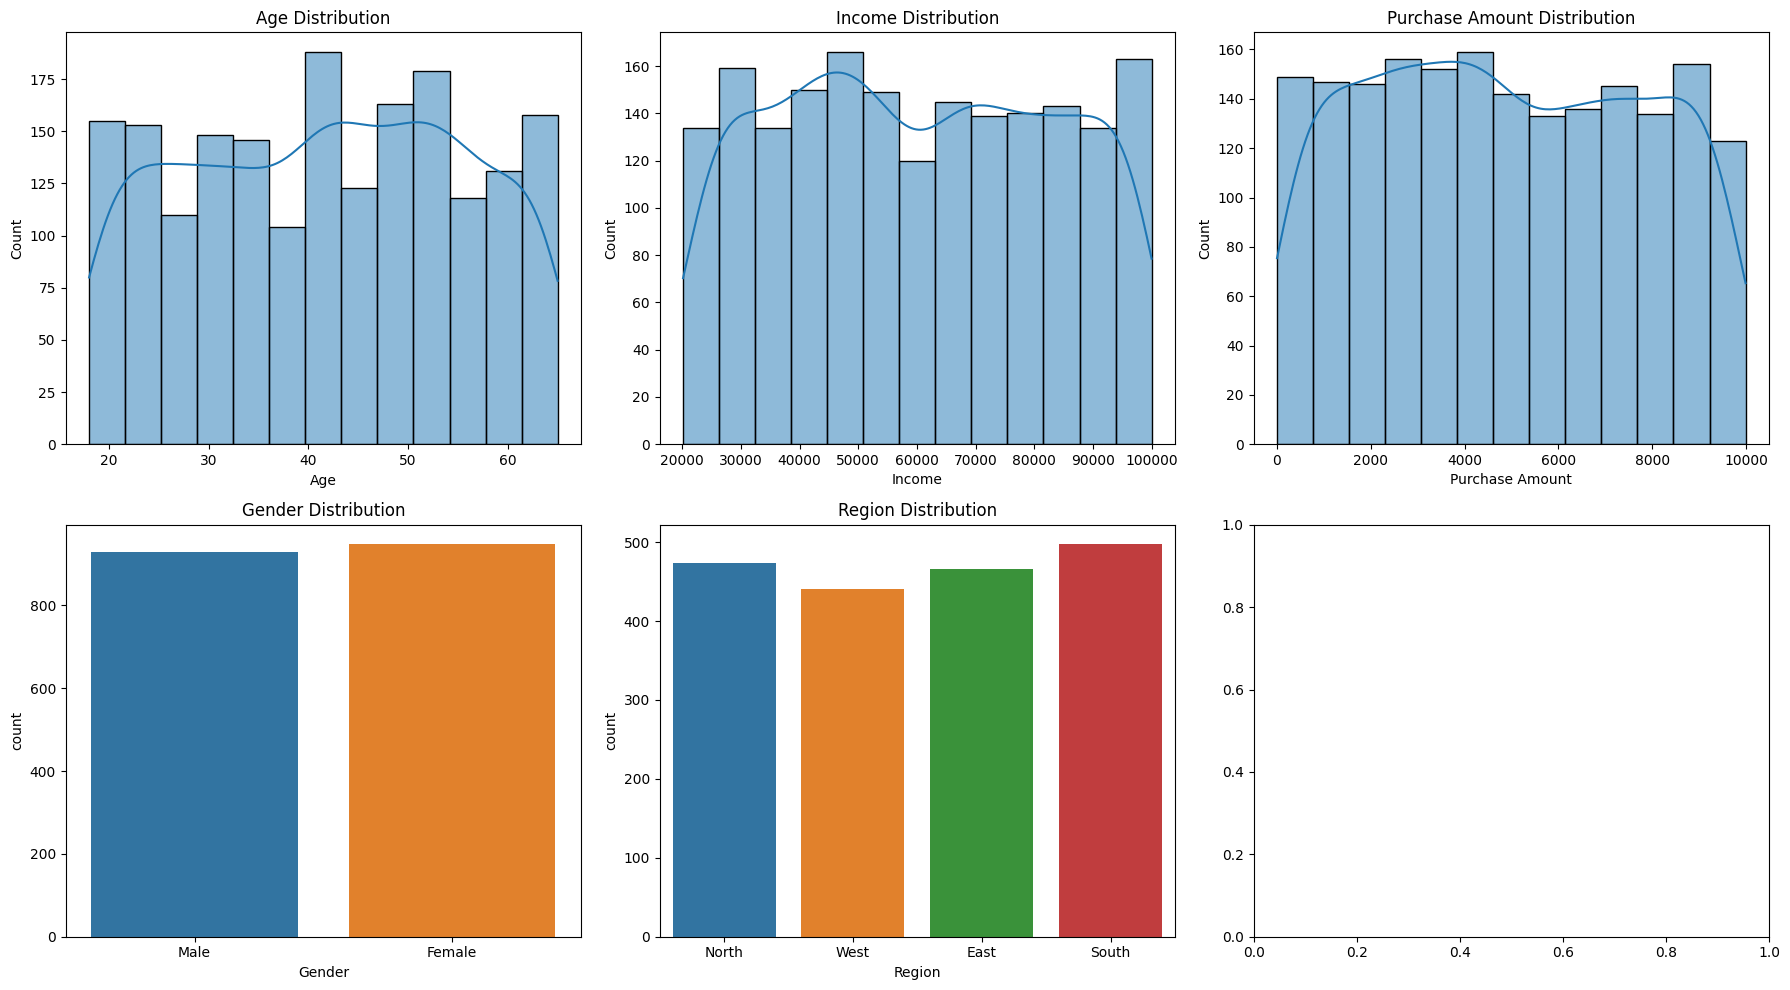

(                Age        Income  Purchase Amount  Gender Region
 count   1876.000000   1876.000000      1876.000000    1876   1876
 unique          NaN           NaN              NaN       2      4
 top             NaN           NaN              NaN  Female  South
 freq            NaN           NaN              NaN     947    497
 mean      41.699360  60067.221215      4890.119403     NaN    NaN
 std       13.705793  23172.960798      2870.733713     NaN    NaN
 min       18.000000  20138.000000         2.000000     NaN    NaN
 25%       30.000000  40300.500000      2458.500000     NaN    NaN
 50%       42.000000  59204.000000      4764.000000     NaN    NaN
 75%       53.000000  80253.500000      7371.750000     NaN    NaN
 max       65.000000  99973.000000      9993.000000     NaN    NaN,
 Age                0
 Income             0
 Purchase Amount    0
 Gender             0
 Region             0
 dtype: int64)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = df.describe(include='all')

# Visualization of distributions
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Age distribution
sns.histplot(df['Age'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title("Age Distribution")

# Income distribution
sns.histplot(df['Income'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title("Income Distribution")

# Purchase Amount distribution
sns.histplot(df['Purchase Amount'], kde=True, ax=ax[0, 2])
ax[0, 2].set_title("Purchase Amount Distribution")

# Gender distribution
sns.countplot(x='Gender', data=df, ax=ax[1, 0])
ax[1, 0].set_title("Gender Distribution")

# Region distribution
sns.countplot(x='Region', data=df, ax=ax[1, 1])
ax[1, 1].set_title("Region Distribution")

plt.tight_layout()
plt.show()

# Check for missing values
missing_values = df.isnull().sum()

summary_stats, missing_values

**Summary Statistics:**

Age: Ranges from 18 to 65 with an average age of around 41.7.

Income: Ranges from 20,138 to 99,973 with an average income of approximately $60,067.

Purchase Amount: Ranges from 2 to 9,993 with an average purchase amount of around $4,890.

Gender: The dataset has a nearly balanced gender distribution, with slightly more females than males.

Region: The samples are distributed across four regions, with the South region having the highest frequency.

**Visual Distributions**:

The distributions of Age, Income, and Purchase Amount are shown as histograms.
The distributions of Gender and Region are shown as bar charts.

**Missing Values**:
No missing values were found in any columns.

# **Step 3: Modify**

This step involves preparing the data for modeling. This can include tasks such as:

1. Handling missing values.
2. Feature engineering.
3. Transforming variables (e.g., normalization).
4. Encoding categorical variables.

**Action**:
1. Handle any missing values, if found.
2. Normalize "Income" and "Purchase Amount" columns.
3. Encode "Gender" and "Region" using one-hot encoding.

`Proceeding with the "Modify" step`.

In [5]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Normalize "Income" and "Purchase Amount"
scaler = MinMaxScaler()
df[['Income', 'Purchase Amount']] = scaler.fit_transform(df[['Income', 'Purchase Amount']])

# One-hot encode "Gender" and "Region"
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[['Gender', 'Region']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gender', 'Region']))

# Drop original "Gender" and "Region" columns and concatenate the encoded columns
df.drop(['Gender', 'Region'], axis=1, inplace=True)
df = pd.concat([df, encoded_df], axis=1)

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Income,Purchase Amount,Gender_Male,Region_North,Region_South,Region_West
0,56,0.375136,0.111500,1.0,1.0,0.0,0.0
1,46,0.623686,0.049044,1.0,0.0,0.0,1.0
2,32,0.411386,0.881694,1.0,0.0,0.0,0.0
3,60,0.866287,0.789310,0.0,1.0,0.0,0.0
4,25,0.576552,0.647783,0.0,0.0,0.0,1.0


**Data Modifications Done**:

**Normalization**:
The "Income" and "Purchase Amount" columns have been normalized to fall within the range [0, 1].

**One-Hot Encoding**: The "Gender" and "Region" columns have been one-hot encoded. This means:

1. For the "Gender" column, we now have a column called Gender_Male where 1 indicates "Male" and 0 indicates "Female".

2. For the "Region" column, we've created three new columns (Region_North, Region_South, and Region_West). If all these columns are 0 for a particular row, it means the region is "East". Otherwise, a 1 in any of these columns indicates the corresponding region for that row.

# **Step 4: Model**
Now, the data is ready for modeling. We decide on an analytical approach, choose appropriate algorithms, and then create models.

**Action**:

1. Split the dataset into training and testing sets.

2. Choose a regression model to predict "Purchase Amount" based on other features.

3. Train the model.


`Now, we'll proceed with the "Model" step.`

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets (80% train, 20% test)
X = df.drop("Purchase Amount", axis=1)
y = df["Purchase Amount"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Modeling Actions Done**:

The dataset was split into a training set (80%) and a testing set (20%).
A linear regression model was trained using the training set.
The trained model was then used to predict the "Purchase Amount" on the testing set.



# **Step 5: Assess**
The final step is to evaluate the performance of the model.

**Action**:

1. Predict "Purchase Amount" on the testing set.

2. Evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Evaluate the model's performance using Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.2567523061367595
Root Mean Squared Error: 0.2941530422657718


**Performance Evaluation**:

**Mean Absolute Error (MAE)**: This metric measures the average absolute difference between the actual and predicted values. Our model has an MAE of approximately 0.257. Given that our "Purchase Amount" values are normalized between 0 and 1, this MAE value indicates that on average, our predictions are off by about 25.7% of the range.

**Root Mean Squared Error (RMSE)**: This metric gives an idea of the magnitude of the error. An RMSE of approximately 0.294 indicates the root mean squared difference between the actual and predicted values.